In [1051]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1150]:
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')

In [1151]:
# # For colab
# train = pd.read_csv('drive/MyDrive/mhack_data/Train.csv')
# test = pd.read_csv('drive/MyDrive/mhack_data/Test.csv')

In [1152]:
train['p+a+c'] = train['purchased']+train['added_in_cart']+train['checked_out']
test['p+a+c'] = test['purchased']+test['added_in_cart']+test['checked_out']

# Let us first drop the outliers from time_spent

In [1153]:
train['time_spent'].describe()

count     5429.000000
mean       663.194292
std       1713.671664
min         14.400000
25%         22.699000
50%         98.312000
75%        600.463000
max      38494.025000
Name: time_spent, dtype: float64

In [1154]:
Q1 = 22.699
Q3 = 600.463
IQR = Q3-Q1
outlier_param = Q3+(1.5*IQR)
outlier_param

1467.109

In [1155]:
d = round(outlier_param - 1400,3)

In [1156]:
train = train[train['time_spent']<=outlier_param]

In [1157]:
active_session = train[train['p+a+c']>=1]
inactive_session = train[train['p+a+c']<1]

In [1158]:
inactive_session.shape,active_session.shape

((3618, 10), (1141, 10))

# Let us take a sample of 2000 data points from inactive sessions to balance out the dataset

In [1159]:
# sample_inactive = inactive_session.sample(n = 2000,random_state = 10)

# Let us now combine the active and inactive sessions

In [1160]:
# train = pd.concat((active_session,sample_inactive))

In [1161]:
train.shape,test.shape

((4759, 10), (2327, 9))

# Change date column dtype

In [1162]:
train['date'] = train['date'].astype('datetime64')
test['date'] = test['date'].astype('datetime64')

# Sorting data by date

In [1163]:
train = train.sort_values('date',ascending = True)
test = test.sort_values('date',ascending = True)

train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

# Function to get cummulative visit number

In [1164]:
def cumulative_no_of_times_record_occured(session_column):
    visit_no = session_column
    ses = []
    count = []
    for i in visit_no.values:
        count.append(ses.count(i)+1)
        ses.append(i)
    return count

In [1165]:
train['visit_number'] = cumulative_no_of_times_record_occured(train['session_number'])
test['visit_number'] = cumulative_no_of_times_record_occured(test['session_number'])

# Imputing median for time_spent as new column with session_id

# Seperate into 3 columns date,month,year

In [1166]:
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['dayofweek'] = train['date'].dt.dayofweek

test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year
test['dayofweek'] = test['date'].dt.dayofweek

# Drop date column from train and test

In [1167]:
train.drop('date',axis = 1,inplace = True)
test.drop('date',axis = 1,inplace = True)

In [1168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      4759 non-null   object 
 1   session_number  4759 non-null   int64  
 2   client_agent    4601 non-null   object 
 3   device_details  4759 non-null   object 
 4   purchased       4759 non-null   int64  
 5   added_in_cart   4759 non-null   int64  
 6   checked_out     4759 non-null   int64  
 7   time_spent      4759 non-null   float64
 8   p+a+c           4759 non-null   int64  
 9   visit_number    4759 non-null   int64  
 10  day             4759 non-null   int64  
 11  month           4759 non-null   int64  
 12  year            4759 non-null   int64  
 13  dayofweek       4759 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 520.6+ KB


C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


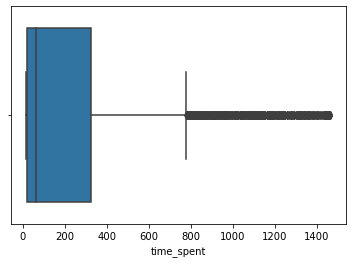

In [1169]:
sns.boxplot(train['time_spent'])

In [1170]:
train

,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,p+a+c,visit_number,day,month,year,dayofweek
0,5531c971b045512d93802cb83b16c112,22,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,Android Tablet - Web,0,0,0,33.317,0,1,6,5,2019,0
1,25f6445089ee87e07b441aaedbd96548,44,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,0,0,43.004,0,1,8,5,2019,2
2,4656d1fb325b26661321cf1908be7f56,11,Product/3.6.0 iPhone/7.1.1,iPhone - iOS,1,0,0,343.806,1,1,9,5,2019,3
3,58cf0ed270dd3672547d314cc6bfe609,11,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; r...,Desktop - Firefox,1,0,0,387.394,1,2,9,5,2019,3
4,6c85e51a692bb06af3f49bb7ac075a51,22,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; r...,Desktop - Firefox,1,0,0,118.704,1,2,11,5,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,8887caa07986d524218f2d44aac3920f,1078,Product/9.0 iPhone/8.1.3,iPhone - iOS,1,0,0,762.144,1,16,15,4,2020,2
4755,50a6326ad2ef4d29bfda0c05b81b7ab0,187,Product/10.0 iPhone/8.2,iPhone - iOS,0,1,0,466.136,1,41,15,4,2020,2
4756,f4ca13911a3193c60707e1b36e870104,385,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,Desktop - Chrome,1,0,0,203.590,1,29,17,4,2020,4
4757,f8a7aaf6b869d05ecf77b32d8345b0b0,374,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,Desktop - Chrome,0,0,0,730.613,0,25,17,4,2020,4


In [1171]:
train.drop(['session_id','client_agent'],axis = 1,inplace = True)
test.drop(['session_id','client_agent'],axis = 1,inplace = True)

In [1172]:
train.columns

Index(['session_number', 'device_details', 'purchased', 'added_in_cart',
       'checked_out', 'time_spent', 'p+a+c', 'visit_number', 'day', 'month',
       'year', 'dayofweek'],
      dtype='object')

In [1173]:
test.columns

Index(['session_number', 'device_details', 'purchased', 'added_in_cart',
       'checked_out', 'p+a+c', 'visit_number', 'day', 'month', 'year',
       'dayofweek'],
      dtype='object')

In [1174]:
train.shape,test.shape

((4759, 12), (2327, 11))

In [1175]:
train['device'] = [i.split('-')[0].strip() for i in train.device_details]
test['device'] = [i.split('-')[0].strip() for i in test.device_details]

train['platform'] = [i.split('-')[1].strip() for i in train.device_details]
test['platform'] = [i.split('-')[1].strip() for i in test.device_details]


In [1176]:
train.drop('device_details',axis = 1,inplace = True)
test.drop('device_details',axis = 1,inplace = True)

In [1177]:
train.shape,test.shape

((4759, 13), (2327, 12))

In [1178]:
train = train.reset_index()
train = train.drop('index',axis = 1)
train.head()

,session_number,purchased,added_in_cart,checked_out,time_spent,p+a+c,visit_number,day,month,year,dayofweek,device,platform
0,22,0,0,0,33.317,0,1,6,5,2019,0,Android Tablet,Web
1,44,0,0,0,43.004,0,1,8,5,2019,2,Desktop,IE
2,11,1,0,0,343.806,1,1,9,5,2019,3,iPhone,iOS
3,11,1,0,0,387.394,1,2,9,5,2019,3,Desktop,Firefox
4,22,1,0,0,118.704,1,2,11,5,2019,5,Desktop,Firefox


In [1179]:
train['device'].unique(),train['platform'].unique()

(array(['Android Tablet', 'Desktop', 'iPhone', 'Unknown', 'iPad',
        'Android Phone', 'Other'], dtype=object),
 array(['Web', 'IE', 'iOS', 'Firefox', 'MobileWeb', 'Safari', 'Chrome',
        'Android', 'Other'], dtype=object))

In [1180]:
train['purchased_mean'] = train['session_number']
train['purchased_mean'] = train['purchased_mean'].replace(dict(train.groupby('session_number')['purchased'].mean()))

train['added_in_cart_mean'] = train['session_number']
train['added_in_cart_mean'] = train['added_in_cart_mean'].replace(dict(train.groupby('session_number')['added_in_cart'].mean()))

train['checked_out_mean'] = train['session_number']
train['checked_out_mean'] = train['checked_out_mean'].replace(dict(train.groupby('session_number')['checked_out'].mean()))

# Have to do same for test set

In [1181]:
# train['purchased_mean'] = train['session_number']
# train['purchased_mean'] = train['purchased_mean'].replace(dict(train.groupby('session_number')['purchased'].mean()))

# train['added_in_cart_mean'] = train['session_number']
# train['added_in_cart_mean'] = train['added_in_cart_mean'].replace(dict(train.groupby('session_number')['added_in_cart'].mean()))

# train['checked_out_mean'] = train['session_number']
# train['checked_out_mean'] = train['checked_out_mean'].replace(dict(train.groupby('session_number')['checked_out'].mean()))


In [1182]:
train

,session_number,purchased,added_in_cart,checked_out,time_spent,p+a+c,visit_number,day,month,year,dayofweek,device,platform,purchased_mean,added_in_cart_mean,checked_out_mean
0,22,0,0,0,33.317,0,1,6,5,2019,0,Android Tablet,Web,0.260355,0.017751,0.000000
1,44,0,0,0,43.004,0,1,8,5,2019,2,Desktop,IE,0.213483,0.056180,0.011236
2,11,1,0,0,343.806,1,1,9,5,2019,3,iPhone,iOS,0.258312,0.015345,0.000000
3,11,1,0,0,387.394,1,2,9,5,2019,3,Desktop,Firefox,0.258312,0.015345,0.000000
4,22,1,0,0,118.704,1,2,11,5,2019,5,Desktop,Firefox,0.260355,0.017751,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,1078,1,0,0,762.144,1,16,15,4,2020,2,iPhone,iOS,0.187500,0.062500,0.000000
4755,187,0,1,0,466.136,1,41,15,4,2020,2,iPhone,iOS,0.219512,0.121951,0.024390
4756,385,1,0,0,203.590,1,29,17,4,2020,4,Desktop,Chrome,0.137931,0.137931,0.000000
4757,374,0,0,0,730.613,0,25,17,4,2020,4,Desktop,Chrome,0.200000,0.160000,0.000000


In [1183]:
train1 = train.copy()
test1 = test.copy()

# One hot encoding categorical columns

In [1184]:
device_dummies_train = pd.get_dummies(train['device'])
device_dummies_test = pd.get_dummies(test['device'])

platform_dummies_train = pd.get_dummies(train['platform'])
platform_dummies_test = pd.get_dummies(test['platform'])

device_dummies_train = device_dummies_train.drop('Unknown',axis = 1)
device_dummies_test = device_dummies_test.drop('Unknown',axis = 1)

platform_dummies_train = platform_dummies_train.drop('Other',axis = 1)
platform_dummies_test = platform_dummies_test.drop('Other',axis = 1)

In [1185]:
train = train.drop(['device','platform'],axis = 1)
test = test.drop(['device','platform'],axis = 1)

In [1186]:
train.shape,test.shape

((4759, 14), (2327, 10))

# Combine the encoded data with the train and test sets

In [1187]:
train = pd.concat((train,device_dummies_train,platform_dummies_train),axis = 1)
test = pd.concat((test,device_dummies_test,platform_dummies_test),axis = 1)

In [1188]:
train.shape,test.shape

((4759, 28), (2327, 24))

# Checking for multicollinearity

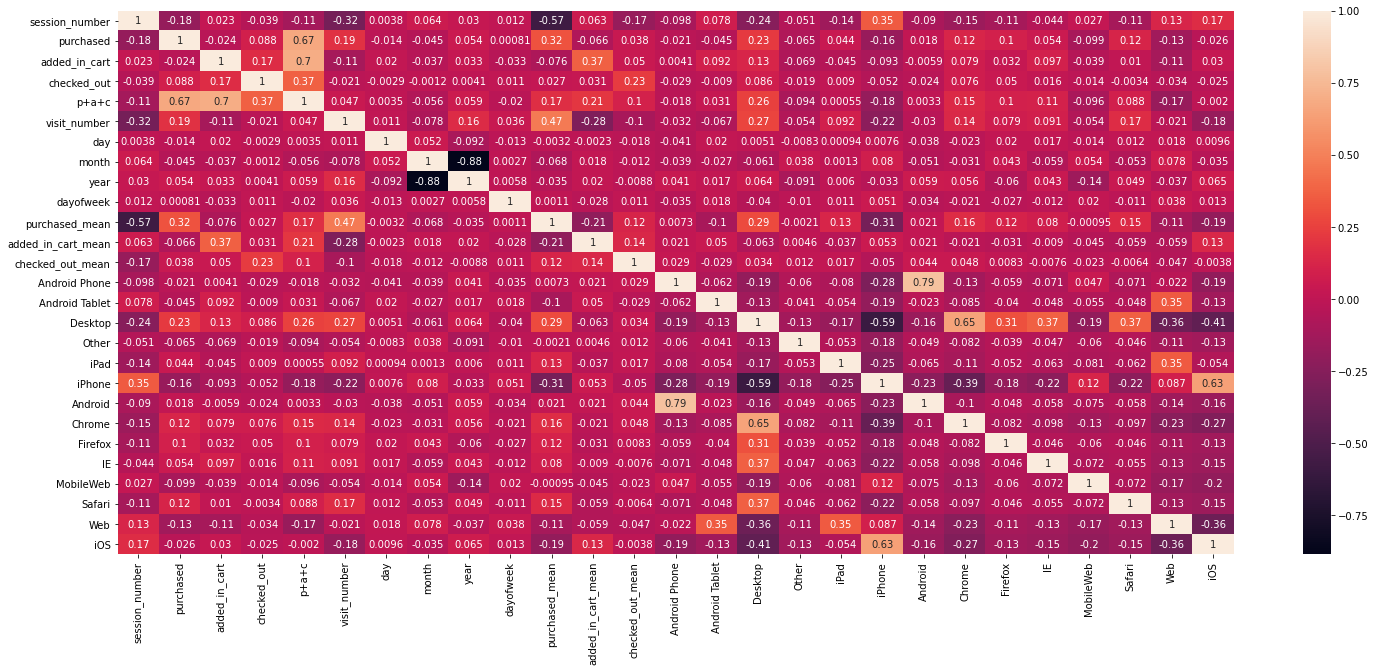

In [1189]:
plt.figure(figsize = (25,10))
sns.heatmap(train.drop('time_spent',axis = 1).corr(),annot = True)
plt.show()

In [1190]:
t1 = train.copy()
t2 = test.copy()

In [1234]:
train = t1
test = t2

In [1235]:
train.columns

Index(['session_number', 'purchased', 'added_in_cart', 'checked_out',
       'time_spent', 'p+a+c', 'visit_number', 'day', 'month', 'year',
       'dayofweek', 'purchased_mean', 'added_in_cart_mean', 'checked_out_mean',
       'Android Phone', 'Android Tablet', 'Desktop', 'Other', 'iPad', 'iPhone',
       'Android', 'Chrome', 'Firefox', 'IE', 'MobileWeb', 'Safari', 'Web',
       'iOS'],
      dtype='object')

In [1236]:
# train = train.drop(['purchased','added_in_cart','checked_out'],axis = 1)

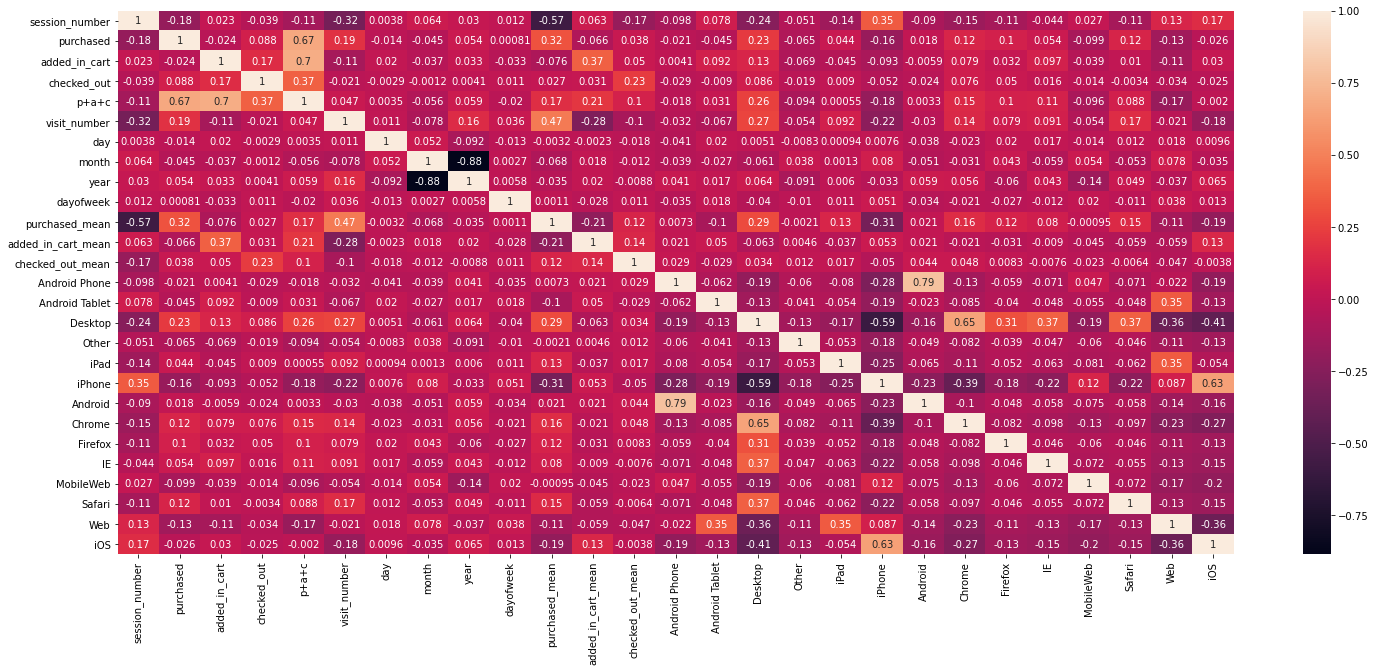

In [1237]:
plt.figure(figsize = (25,10))
sns.heatmap(train.drop('time_spent',axis = 1).corr(),annot = True)
plt.show()

# Bagging with RandomForest

In [1238]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [1239]:
def scoring(y_test,y_pred):
    return np.sqrt(mean_squared_log_error( y_test, abs(y_pred)))

In [1240]:
X = train.drop('time_spent',axis = 1)
y = train['time_spent']

# Removing high VIF variables

In [1241]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
vif1 = pd.DataFrame(vif_data)

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [1242]:
drop_cols = vif1[vif1['VIF']>10]['feature'].values

In [1243]:
train = train.drop(drop_cols,axis = 1)

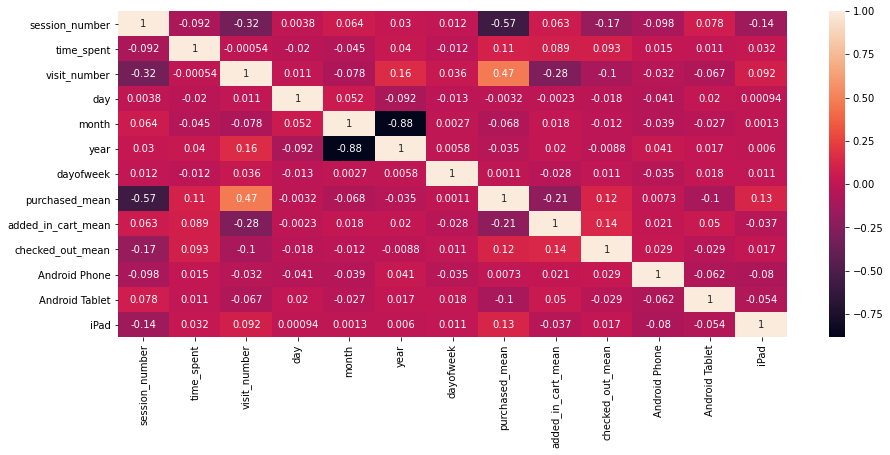

In [1244]:
plt.figure(figsize = (15,6))
sns.heatmap(train.corr(),annot = True)

In [1245]:
X = train.drop('time_spent',axis = 1)
y = train['time_spent']

In [1246]:
ss = StandardScaler()
x_scaled = ss.fit_transform(X)
y = train['time_spent']
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.15,random_state =6)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4045, 12), (714, 12), (4045,), (714,))

# Applying PCA

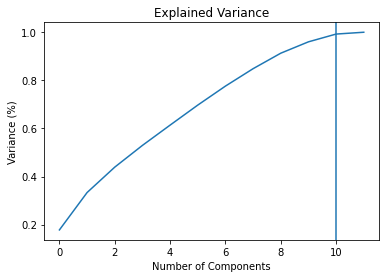

In [1260]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.axvline(10)
plt.show()

In [1261]:
pca = PCA(n_components=10)
new_data = pca.fit_transform(x_scaled)
# This will be the new data fed to the algorithm.
X_scaled = pd.DataFrame(data = new_data)
X_scaled.shape

(4759, 10)

In [1262]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state =6)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3807, 10), (952, 10), (3807,), (952,))

In [1263]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [1264]:
msle = make_scorer(scoring,greater_is_better = False)

In [1265]:
# param = {
    
#     'n_estimators': [20,21,22,23,24,25,26,27,28,29,30],
#     'criterion': ['mse','mae'],
#     'min_samples_split': [6,7,8,9,10,11,12,13,14,15],
#     'min_samples_leaf': [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

# }

In [1266]:
# grid_search = GridSearchCV(RandomForestRegressor(),param,scoring = msle,n_jobs = -1,cv = 5,verbose = 3)
# grid_search.fit(x_train,y_train)

In [1267]:
# bp = grid_search.best_params_
# bp

In [1268]:
bp = {
    'n_estimators': 20,
    'criterion': 'mae',
    'min_samples_split': 10,
    'min_samples_leaf': 27
}

In [1269]:
Bag_rand_clf = RandomForestRegressor(n_estimators = bp['n_estimators'],criterion = bp['criterion'],min_samples_leaf = bp['min_samples_leaf'],min_samples_split = bp['min_samples_split'])
Bag_rand_clf.fit(x_train,y_train)
y_pred = Bag_rand_clf.predict(x_test)
scoring(y_test,y_pred),Bag_rand_clf.score(x_test,y_test)#23,24,25(1.038),26(1.031)         #21                             #50(1.030)

(1.444120553954906, -0.10605598011847928)

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


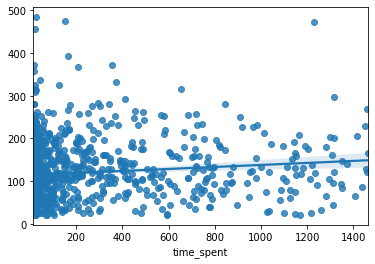

In [1270]:
sns.regplot(y_test,y_pred)
plt.show()

In [1258]:
# Test_scaled = ss.fit_transform(test)

# #Applying PCA to test set

# pca = PCA(n_components=11)
# new_data = pca.fit_transform(Test_scaled)
# # This will be the new data fed to the algorithm.
# test_scaled = pd.DataFrame(data = new_data)


# predictions = Bag_rand_clf.predict(test_scaled)
# predictions = predictions
# sns.kdeplot(predictions)
# plt.show()

In [1259]:
# pd.DataFrame(predictions,columns = ['time_spent']).to_csv('Submissions/bagrfpca.csv',index = False)

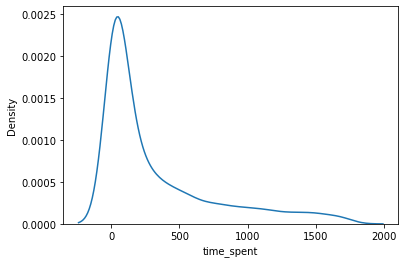

In [535]:
sns.kdeplot(train['time_spent'])

In [509]:
# sub = pd.DataFrame(predictions,columns = ['time_spent'])
# sub.to_csv('Submissions/29-02-2020-balancedbagPCA.csv',index = False)

In [ ]:
# t = pd.read_csv('Submissions/balancedbagPCA.csv')
# t[t['time_spent'] == min(t['time_spent'])]